![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Ph√¢n t√≠ch d·ªØ li·ªáu.


In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud
%pip install plotly
%pip install ipykernel
%pip install nbformat 

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import datetime

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## ƒê·ªçc file Csv


In [5]:
df = pd.read_csv(
    'yeuusuk.csv'
)

# T·ªïng quan v·ªÅ d·ªØ li·ªáu thu th·∫≠p


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          95 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [7]:
print(f"Love_USUK rows: {df.iloc[:, 0]}, Columns: {df.shape[1]}")


Love_USUK rows: 0     747839004050965
1     747186554116210
2     746684997499699
3     745882380913294
4     745879927580206
           ...       
95    705491651619034
96    705376224963910
97    705374204964112
98    704816088353257
99    704808921687307
Name: post_id, Length: 100, dtype: int64, Columns: 51



# L∆∞·ª£t reaction theo th·ªùi gian ƒëƒÉng b√†i

In [8]:
df[['time','timestamp' ,'reaction_count']]

time   timestamp  reaction_count
0   2023-11-30 15:09:54  1701331794            1631
1   2023-11-29 08:38:44  1701221924             996
2   2023-11-28 09:12:34  1701137554            4025
3   2023-11-26 21:05:58  1701007558            1884
4   2023-11-26 20:59:52  1701007192            1048
..                  ...         ...             ...
95  2023-09-15 17:30:47  1694773847             279
96  2023-09-15 13:16:20  1694758580            2033
97  2023-09-15 13:10:37  1694758237            3344
98  2023-09-14 13:53:03  1694674383             670
99  2023-09-14 13:35:24  1694673324            2894

[100 rows x 3 columns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# The chart shows the reaction performance of posts over time

In [9]:
average_reactions = df['reaction_count'].mean()
print(average_reactions)

2066.46


In [10]:
df['time'] = pd.to_datetime(df['time'])


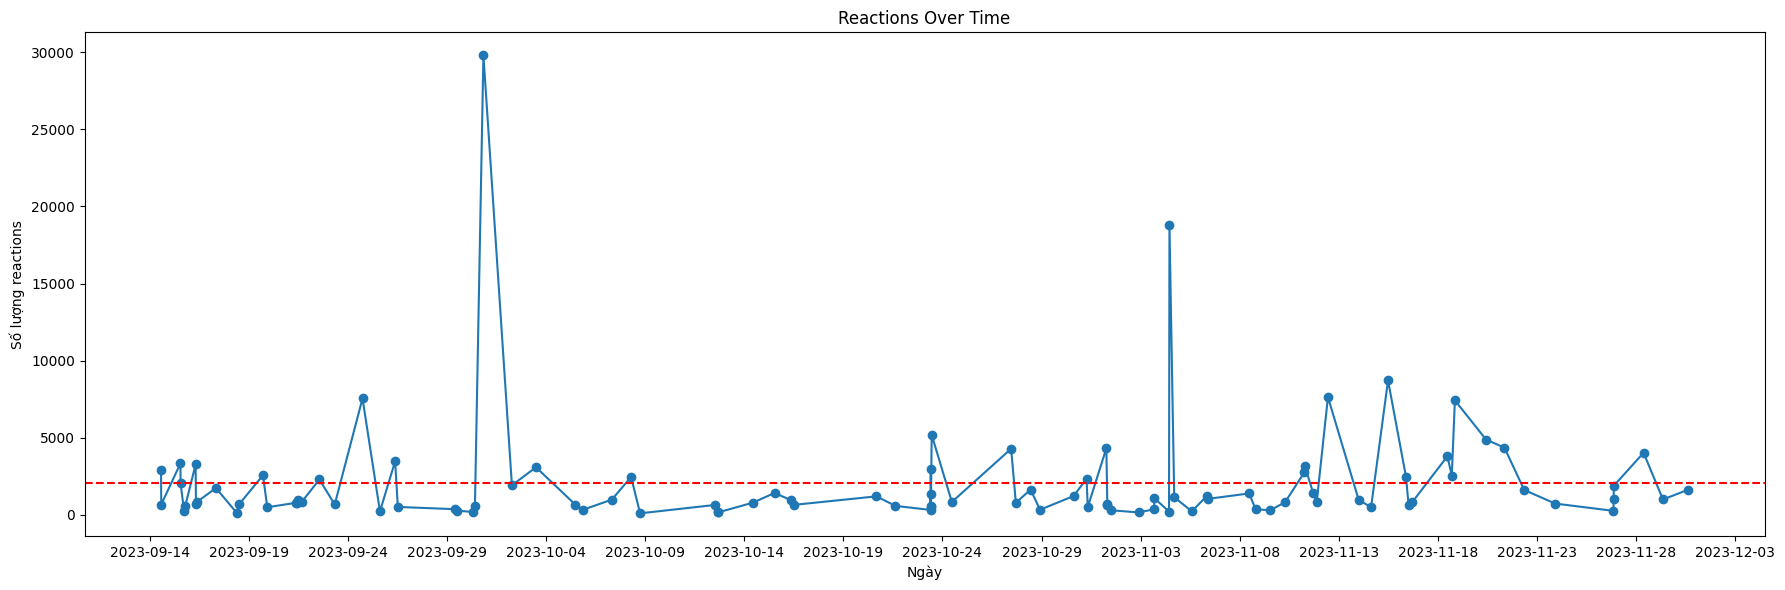

In [11]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
dates = df['time'].to_list()
y = df['reaction_count'].to_list()

plt.figure(figsize=(18, 6))
plt.plot_date(dates, y, linestyle='solid')
plt.gca().xaxis.set_major_locator(DayLocator(interval= 5)) 
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.axhline(y=average_reactions, color='r', linestyle='--', label='Average Reactions')
plt.xlabel('Ng√†y')
plt.ylabel('S·ªë l∆∞·ª£ng reactions')
plt.title('Reactions Over Time')
plt.tight_layout()

plt.show()


V·ªõi gi√° tr·ªã l∆∞·ª£t reactions trung b√¨nh l√† kho·∫£ng 2000. D·ª±a v√†o bi·ªÉu ƒë·ªì tr√™n, xu h∆∞·ªõng c·ªßa k√™nh s·∫Ω giao ƒë·ªông kho·∫£ng trung b√¨nh v√† s·∫Ω b√πng n·ªï v√†o 1 s·ªë s·ª± ki·ªán ƒë·∫∑c bi·ªát.

Ng√†y 30-09-2023 c√≥ m·ªôt s·ª± ki·ªán b√πng n·ªï l√† b·ª©c ch·ª•p c√≥ 4 n·ªØ di√™n vi√™n trong l√†ng gi·∫£i tr√≠ Hollywood

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Chia c·ªôt 'reactions' th√†nh nh·ªØng c·ªôt ri√™ng.


In [12]:
import pandas as pd
df_reactions = df['reactions'].apply(eval).apply(pd.Series)
merged_df = pd.merge(df, df_reactions, left_index=True, right_index=True)



In [13]:
merged_df_copy = merged_df.copy()

In [14]:
del_cols = ["shared_text", "original_text", "timestamp", "video_size_MB", "image", "image_lowquality", "images", "images_description", "images_lowquality", "images_lowquality_description", "video", "video_duration_seconds", "video_height", "video_id", "video_quality", "video_thumbnail", "video_watches", "video_width", "post_url", "link", "links", "user_id", "username", "user_url", "is_live", "factcheck", "shared_post_id", "shared_time", "shared_user_id", "shared_username", "shared_post_url", "available", "reactors", "w3_fb_url", "with", "page_id", "sharers", "image_id", "image_ids", "was_live"]

In [15]:
merged_df.drop(del_cols, axis=1, inplace=True)

In [16]:
merged_df

post_id                                               text  \
0   747839004050965  L·∫¶N ƒê·∫¶U TI√äN MAROON 5 T·ªöI THƒÇM VI·ªÜT NAM üòç\n\nG...   
1   747186554116210  ‚ùóCharli XCX x√°c nh·∫≠n ƒë√≠nh h√¥n v·ªõi th√†nh vi√™n G...   
2   746684997499699  ‚ùóM·ªôt Gi√°m m·ª•c C√¥ng Gi√°o, ng∆∞·ªùi ƒë√£ cho ph√©p Sab...   
3   745882380913294  C√ÇU CHUY·ªÜN DEMI LOVATO & G√Ä T√ÇY\n\nL·ªùi chia s·∫ª...   
4   745879927580206  ‚ùóBeyonc√© xu·∫•t hi·ªán t·∫°i th·∫£m ƒë·ªè Renaissance Fil...   
..              ...                                                ...   
95  705491651619034  ‚ùóDoja Cat selfie v·ªõi phi√™n b·∫£n Ma-la-canh gi·ªën...   
96  705376224963910  < C√ì TH·ªÇ B·∫†N CH∆ØA BI·∫æT >\n\n‚ùóAmber Heard v√† El...   
97  705374204964112  ‚ùóELON MUSK ƒêƒÇNG ·∫¢NH NYC AMBER HEARD COSPLAY CH...   
98  704816088353257  ‚ùóBillboard li·ªát k√™ Miley Cyrus v√†o danh s√°ch n...   
99  704808921687307  "Ch·∫øt ti·ªát, tui kh√¥ng bi·∫øt tui b.·ª± ƒë·∫øn v·∫≠y lun...   

                                            post_text                time  \
0   L·∫¶N ƒê·∫¶U TI√äN MAROON 5 T·ªöI THƒÇM VI·ªÜT NAM üòç\n\nG... 2023-11-30 15:09:54   
1   ‚ùóCharli XCX x√°c nh·∫≠n ƒë√≠nh h√¥n v·ªõi th√†nh vi√™n G... 2023-11-29 08:38:44   
2   ‚ùóM·ªôt Gi√°m m·ª•c C√¥ng Gi√°o, ng∆∞·ªùi ƒë√£ cho ph√©p Sab... 2023-11-28 09:12:34   
3   C√ÇU CHUY·ªÜN DEMI LOVATO & G√Ä T√ÇY\n\nL·ªùi chia s·∫ª... 2023-11-26 21:05:58   
4   ‚ùóBeyonc√© xu·∫•t hi·ªán t·∫°i th·∫£m ƒë·ªè Renaissance Fil... 2023-11-26 20:59:52   
..                                                ...                 ...   
95  ‚ùóDoja Cat selfie v·ªõi phi√™n b·∫£n Ma-la-canh gi·ªën... 2023-09-15 17:30:47   
96  < C√ì TH·ªÇ B·∫†N CH∆ØA BI·∫æT >\n\n‚ùóAmber Heard v√† El... 2023-09-15 13:16:20   
97  ‚ùóELON MUSK ƒêƒÇNG ·∫¢NH NYC AMBER HEARD COSPLAY CH... 2023-09-15 13:10:37   
98  ‚ùóBillboard li·ªát k√™ Miley Cyrus v√†o danh s√°ch n... 2023-09-14 13:53:03   
99  "Ch·∫øt ti·ªát, tui kh√¥ng bi·∫øt tui b.·ª± ƒë·∫øn v·∫≠y lun... 2023-09-14 13:35:24   

    likes  comments  shares  \
0     NaN       168      38   
1     NaN         6       2   
2     NaN       134      56   
3     NaN        45      13   
4     NaN        11       3   
..    ...       ...     ...   
95    NaN         8       0   
96    NaN        30       5   
97    NaN        54      12   
98    NaN        22       2   
99    NaN        18      18   

                                        comments_full  \
0   [{'comment_id': '368325572427024', 'comment_ur...   
1   [{'comment_id': '722064739821622', 'comment_ur...   
2   [{'comment_id': '1461920737982701', 'comment_u...   
3   [{'comment_id': '729874898629578', 'comment_ur...   
4   [{'comment_id': '1297179080840531', 'comment_u...   
..                                                ...   
95  [{'comment_id': '1269268360453442', 'comment_u...   
96  [{'comment_id': '218432547615942', 'comment_ur...   
97  [{'comment_id': '758961622701547', 'comment_ur...   
98  [{'comment_id': '869597251229784', 'comment_ur...   
99  [{'comment_id': '1385259312204492', 'comment_u...   

                                            reactions  reaction_count  \
0   {'th√≠ch': 472, 'y√™u th√≠ch': 21, 'haha': 910, '...            1631   
1   {'th√≠ch': 845, 'y√™u th√≠ch': 135, 'haha': 3, 'w...             996   
2   {'th√≠ch': 2846, 'y√™u th√≠ch': 27, 'haha': 678, ...            4025   
3   {'th√≠ch': 876, 'y√™u th√≠ch': 7, 'haha': 965, 'w...            1884   
4   {'th√≠ch': 851, 'y√™u th√≠ch': 181, 'haha': 2, 'w...            1048   
..                                                ...             ...   
95  {'th√≠ch': 195, 'y√™u th√≠ch': 3, 'haha': 58, 'wo...             279   
96  {'th√≠ch': 1663, 'y√™u th√≠ch': 18, 'haha': 330, ...            2033   
97  {'th√≠ch': 2381, 'y√™u th√≠ch': 32, 'haha': 870, ...            3344   
98  {'th√≠ch': 520, 'y√™u th√≠ch': 5, 'haha': 10, 'bu...             670   
99  {'th√≠ch': 1475, 'y√™u th√≠ch': 19, 'haha': 1358,...            2894   

           

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Reaction classification chart

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15392\3215032407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lo·∫°i reactions', y='T·ªïng s·ªë l∆∞·ª£t', data=total_reactions, palette='viridis')


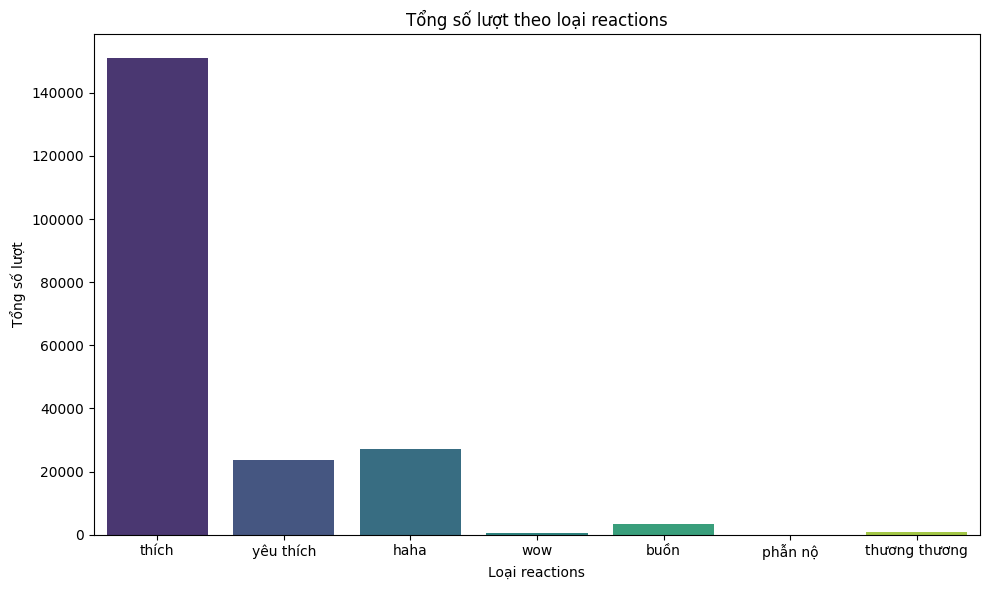

In [17]:
total_reactions = merged_df[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']].sum().reset_index()
total_reactions.columns = ['Lo·∫°i reactions', 'T·ªïng s·ªë l∆∞·ª£t']
plt.figure(figsize=(10, 6))
sns.barplot(x='Lo·∫°i reactions', y='T·ªïng s·ªë l∆∞·ª£t', data=total_reactions, palette='viridis')
plt.xlabel('Lo·∫°i reactions')
plt.ylabel('T·ªïng s·ªë l∆∞·ª£t')
plt.title('T·ªïng s·ªë l∆∞·ª£t theo lo·∫°i reactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
total_reactions = merged_df[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']].sum().reset_index()
total_reactions.columns = ['Lo·∫°i reactions', 'T·ªïng s·ªë l∆∞·ª£t']
fig = px.pie(names=total_reactions['Lo·∫°i reactions'][1:],
             values=total_reactions['T·ªïng s·ªë l∆∞·ª£t'][1:],
             hole=0.6, width=1000, height=600)

fig.show()

L∆∞·ª£t likes v√† loves c·ªßa page kh√° g·∫ßn nhau v√† v∆∞·ª£t tr·ªôi so v·ªõi nh·ªØng c·∫£m x√∫c kh√°c. M·ªçi ng∆∞·ªùi c√≥ v·∫ª ƒë·ªÅu r·∫•t th√≠ch m·ªói khi m·ªôt ngh·ªá sƒ© ƒë∆∞·ª£c nh·∫Øc ƒë·∫øn.

In [19]:
import pandas as pd
import plotly.express as px
merged_df['hour'] = merged_df['time'].dt.hour
reactions_by_hour = merged_df.groupby('hour')[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']].sum()
reactions_by_hour = reactions_by_hour.reset_index().melt(id_vars='hour', var_name='Lo·∫°i reactions', value_name='T·ªïng s·ªë l∆∞·ª£t')
fig = px.line(reactions_by_hour, x='hour', y='T·ªïng s·ªë l∆∞·ª£t', color='Lo·∫°i reactions',
              title='S·ªë l∆∞·ª£t reactions trong t·ª´ng kho·∫£ng th·ªùi gian trong 1 ng√†y',
              labels={'hour': 'Gi·ªù', 'T·ªïng s·ªë l∆∞·ª£t': 'T·ªïng s·ªë l∆∞·ª£t reactions'})
fig.show()


10h s√°ng v√† 10h t·ªëi l√† kho·∫£ng th∆°√¨ ƒëi·ªÉm m√† m·ªçi ng∆∞·ªùi s·∫Ω react nhi·ªÅu nh·∫•t. V·∫≠y n√™n page c·∫ßn ƒëƒÉng nh·ªØng th√¥ng tin quan tr·ªçng v√† n√≥ng h·ªïi nh·∫•t v√†o th·ªùi gian n√†y.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## M·ªëi quan h·ªá gi·ªØa l∆∞·ª£t share v√† l∆∞·ª£t reactions

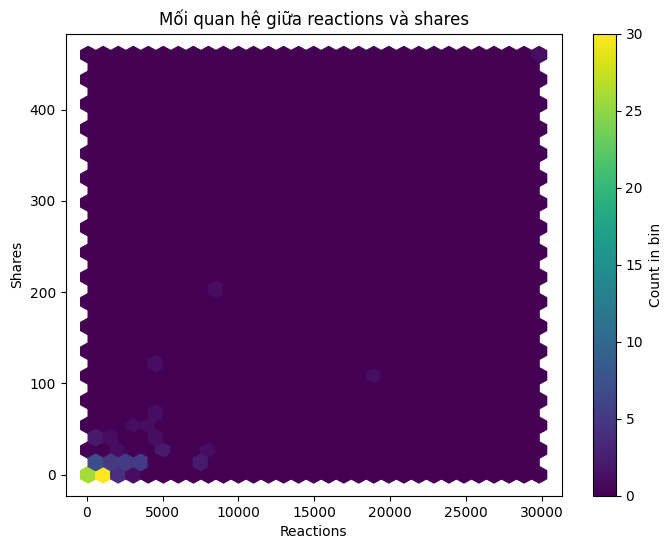

In [20]:
import matplotlib.pyplot as plt
reactions = df['reaction_count']
shares = df['shares']
plt.figure(figsize=(8, 6))
plt.hexbin(reactions, shares, gridsize=30, cmap='viridis')  
plt.colorbar(label='Count in bin')
plt.title('M·ªëi quan h·ªá gi·ªØa reactions v√† shares')  
plt.xlabel('Reactions') 
plt.ylabel('Shares') 

plt.show()


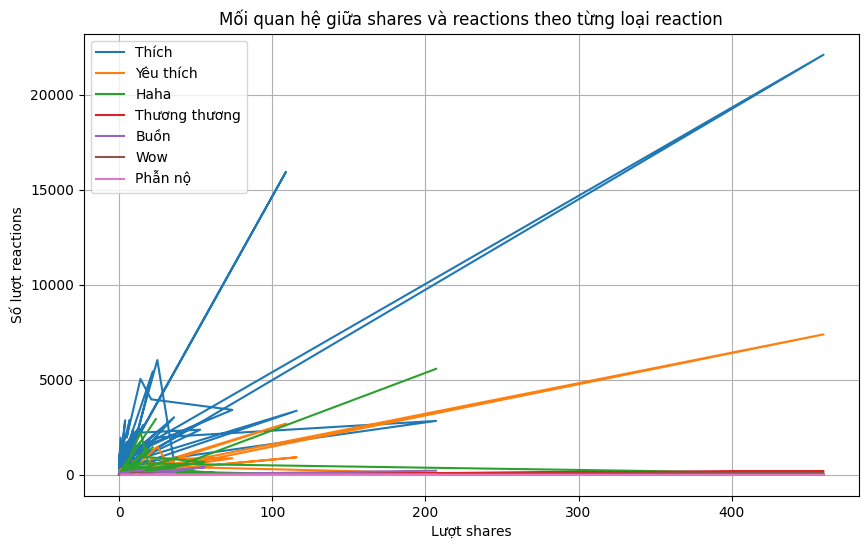

In [21]:
import matplotlib.pyplot as plt
categories = ['Th√≠ch', 'Y√™u th√≠ch', 'Haha', 'Th∆∞∆°ng th∆∞∆°ng', 'Bu·ªìn', 'Wow', 'Ph·∫´n n·ªô']
values_reactions = [merged_df['th√≠ch'], merged_df['y√™u th√≠ch'], merged_df['haha'],
                    merged_df['th∆∞∆°ng th∆∞∆°ng'], merged_df['bu·ªìn'], merged_df['wow'], merged_df['ph·∫´n n·ªô']]
values_shares = merged_df['shares']
plt.figure(figsize=(10, 6))
for i, reaction in enumerate(categories):
    plt.plot(values_shares, values_reactions[i], label=reaction)
plt.xlabel('L∆∞·ª£t shares')
plt.ylabel('S·ªë l∆∞·ª£t reactions')
plt.title('M·ªëi quan h·ªá gi·ªØa shares v√† reactions theo t·ª´ng lo·∫°i reaction')
plt.legend()
plt.grid(True)

plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Bi·ªÉu ƒë·ªì reactions theo ng√†y.


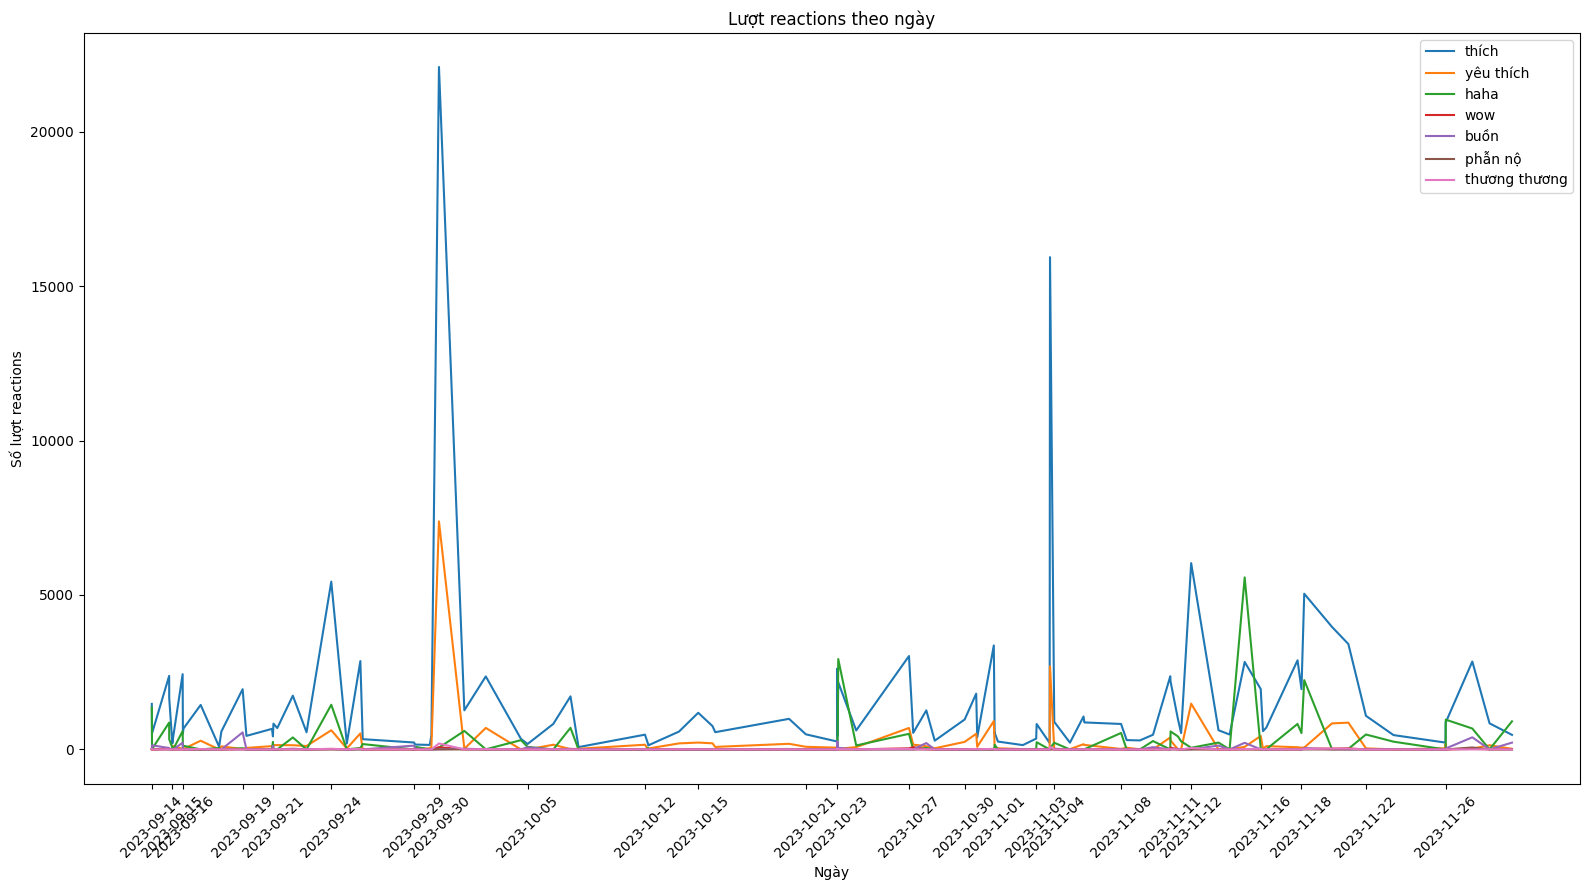

In [22]:
reactions_by_date = merged_df.groupby('time')[['th√≠ch', 'y√™u th√≠ch', 'haha', 'wow', 'bu·ªìn', 'ph·∫´n n·ªô', 'th∆∞∆°ng th∆∞∆°ng']].sum()
plt.figure(figsize=(16, 9))
for column in reactions_by_date.columns:
    plt.plot(reactions_by_date.index, reactions_by_date[column], label=column)
plt.xlabel('Ng√†y')
plt.ylabel('S·ªë l∆∞·ª£t reactions')
plt.title('L∆∞·ª£t reactions theo ng√†y')
plt.legend()
plt.xticks(rotation=45)
plt.xticks(reactions_by_date.index[::4])
plt.tight_layout()
plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## ƒê·ªçc t·∫•t c·∫£ b√†i post

In [23]:
df = pd.DataFrame(df)
df_text = df[['post_id', 'post_text']]
text = str(df_text['post_text'])
print(text)


0     L·∫¶N ƒê·∫¶U TI√äN MAROON 5 T·ªöI THƒÇM VI·ªÜT NAM üòç\n\nG...
1     ‚ùóCharli XCX x√°c nh·∫≠n ƒë√≠nh h√¥n v·ªõi th√†nh vi√™n G...
2     ‚ùóM·ªôt Gi√°m m·ª•c C√¥ng Gi√°o, ng∆∞·ªùi ƒë√£ cho ph√©p Sab...
3     C√ÇU CHUY·ªÜN DEMI LOVATO & G√Ä T√ÇY\n\nL·ªùi chia s·∫ª...
4     ‚ùóBeyonc√© xu·∫•t hi·ªán t·∫°i th·∫£m ƒë·ªè Renaissance Fil...
                            ...                        
95    ‚ùóDoja Cat selfie v·ªõi phi√™n b·∫£n Ma-la-canh gi·ªën...
96    < C√ì TH·ªÇ B·∫†N CH∆ØA BI·∫æT >\n\n‚ùóAmber Heard v√† El...
97    ‚ùóELON MUSK ƒêƒÇNG ·∫¢NH NYC AMBER HEARD COSPLAY CH...
98    ‚ùóBillboard li·ªát k√™ Miley Cyrus v√†o danh s√°ch n...
99    "Ch·∫øt ti·ªát, tui kh√¥ng bi·∫øt tui b.·ª± ƒë·∫øn v·∫≠y lun...
Name: post_text, Length: 100, dtype: object


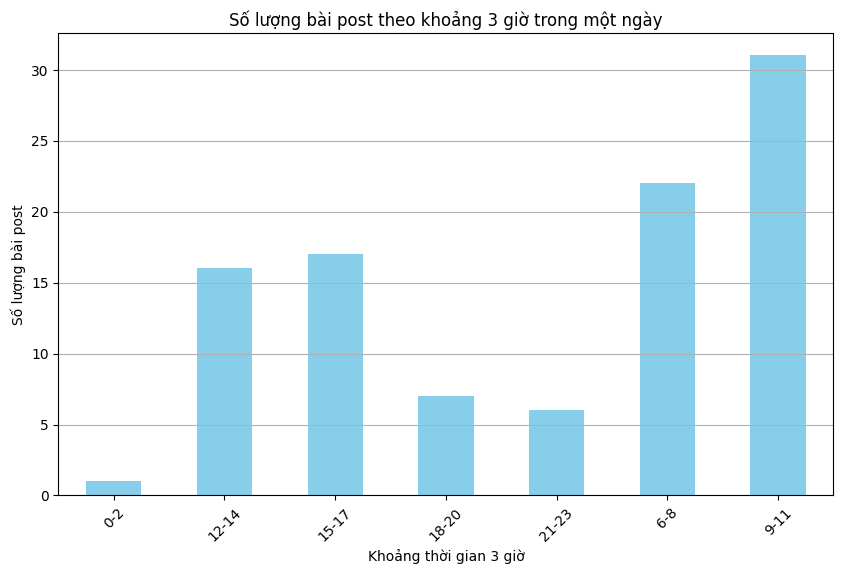

In [24]:
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df['hour'] = merged_df['time'].dt.hour
merged_df['3_hour_interval'] = ((merged_df['hour'] // 3) * 3).astype(str) + '-' + ((merged_df['hour'] // 3) * 3 + 2).astype(str)
posts_by_3_hour_interval = merged_df.groupby('3_hour_interval').size()
plt.figure(figsize=(10, 6))
posts_by_3_hour_interval.plot(kind='bar', color='skyblue')
plt.title('S·ªë l∆∞·ª£ng b√†i post theo kho·∫£ng 3 gi·ªù trong m·ªôt ng√†y')
plt.xlabel('Kho·∫£ng th·ªùi gian 3 gi·ªù')
plt.ylabel('S·ªë l∆∞·ª£ng b√†i post')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Page ch·ªß y·∫øu ho·∫°t ƒë·ªông v√†o tr∆∞a v√† t·ªëi. T·∫ßm gi·ªù ho·∫°t ƒë·ªông m·∫°nh nh·∫•t k√† t·ª´ 9-11h. R√µ r√†ng l√† m·ªôt page h∆∞·ªõng ƒë·∫øn gi·ªõi tr·∫ª.


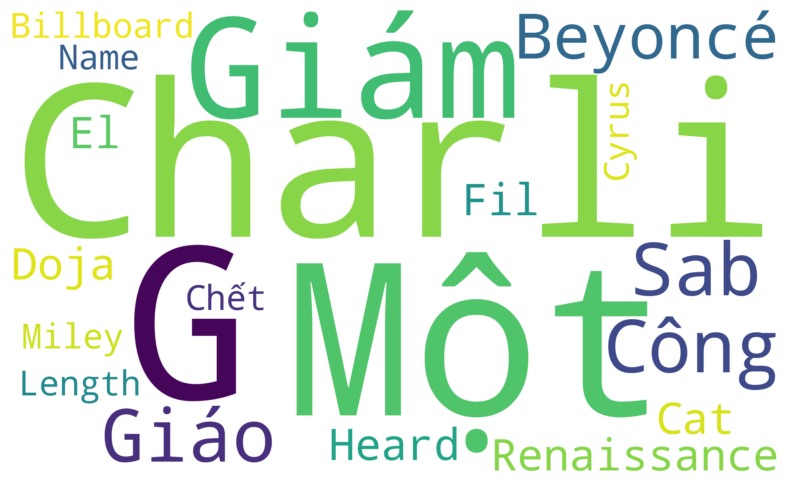

In [25]:
from wordcloud import WordCloud, STOPWORDS
def loc_ten_nguoi_noi_tieng(text):
    words = text.split()
    filtered_words = [word for word in words if word.istitle()]
    return filtered_words

filtered_names = loc_ten_nguoi_noi_tieng(text)
filtered_text = ' '.join(filtered_names)

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                     ).generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


M·ªôt s·ªë ngh·ªá sƒ© n·ªïi b·∫≠t th∆∞·ªùng ƒë∆∞·ª£c nh·∫Øc t·ªõi.

In [26]:
max_reactions_post = merged_df[merged_df['reaction_count'] == merged_df['reaction_count'].max()]
max_reactions_post


post_id                                               text  \
71  714422660725933  ‚ùóT·ª® ƒê·∫†I M·ª∏ NH√ÇN L√ÄNG PHIM HOLLYWOOD‚ù§Ô∏è\n\n‚ú®Jenn...   

                                            post_text                time  \
71  ‚ùóT·ª® ƒê·∫†I M·ª∏ NH√ÇN L√ÄNG PHIM HOLLYWOOD‚ù§Ô∏è\n\n‚ú®Jenn... 2023-09-30 20:04:25   

    likes  comments  shares  \
71    NaN      1041     460   

                                        comments_full  \
71  [{'comment_id': '3204184899876324', 'comment_u...   

                                            reactions  reaction_count  \
71  {'th√≠ch': 22093, 'y√™u th√≠ch': 7383, 'haha': 59...           29807   

                  fetched_time    th√≠ch  y√™u th√≠ch  haha   wow  th∆∞∆°ng th∆∞∆°ng  \
71  2023-11-30 18:17:37.364090  22093.0     7383.0  59.0  72.0          193.0   

    bu·ªìn  ph·∫´n n·ªô  hour 3_hour_interval  
71   6.0      1.0    20           18-20

In [27]:
max_shares_post = merged_df[merged_df['shares'] == merged_df['shares'].max()]
max_reactions_post


post_id                                               text  \
71  714422660725933  ‚ùóT·ª® ƒê·∫†I M·ª∏ NH√ÇN L√ÄNG PHIM HOLLYWOOD‚ù§Ô∏è\n\n‚ú®Jenn...   

                                            post_text                time  \
71  ‚ùóT·ª® ƒê·∫†I M·ª∏ NH√ÇN L√ÄNG PHIM HOLLYWOOD‚ù§Ô∏è\n\n‚ú®Jenn... 2023-09-30 20:04:25   

    likes  comments  shares  \
71    NaN      1041     460   

                                        comments_full  \
71  [{'comment_id': '3204184899876324', 'comment_u...   

                                            reactions  reaction_count  \
71  {'th√≠ch': 22093, 'y√™u th√≠ch': 7383, 'haha': 59...           29807   

                  fetched_time    th√≠ch  y√™u th√≠ch  haha   wow  th∆∞∆°ng th∆∞∆°ng  \
71  2023-11-30 18:17:37.364090  22093.0     7383.0  59.0  72.0          193.0   

    bu·ªìn  ph·∫´n n·ªô  hour 3_hour_interval  
71   6.0      1.0    20           18-20

In [28]:
max_comment_post = df[df['shares'] == df['shares'].max()]
max_comment_post

post_id                                               text  \
71  714422660725933  ‚ùóT·ª® ƒê·∫†I M·ª∏ NH√ÇN L√ÄNG PHIM HOLLYWOOD‚ù§Ô∏è\n\n‚ú®Jenn...   

                                            post_text  shared_text  \
71  ‚ùóT·ª® ƒê·∫†I M·ª∏ NH√ÇN L√ÄNG PHIM HOLLYWOOD‚ù§Ô∏è\n\n‚ú®Jenn...          NaN   

    original_text                time   timestamp  \
71            NaN 2023-09-30 20:04:25  1696079065   

                                                image  \
71  https://scontent.fhan5-11.fna.fbcdn.net/v/t39....   

                                     image_lowquality  \
71  https://scontent.fhan5-11.fna.fbcdn.net/v/t39....   

                                               images  ...  \
71  ['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...  ...   

                                            w3_fb_url  \
71  https://www.facebook.com/yeuusuk/posts/7144226...   

                                            reactions reaction_count with  \
71  {'th√≠ch': 22093, 'y√™u th√≠ch': 7383, 'haha': 59...          29807  NaN   

            page_id  sharers      image_id            image_ids  was_live  \
71  127840080604880      NaN  7.144337e+14  ['714433714058161']     False   

                  fetched_time  
71  2023-11-30 18:17:37.364090  

[1 rows x 51 columns]

ƒê√¢y l√† b√†i post c√≥ ƒë∆∞·ª£c c·∫£ 3 ch·ªâ s·ªë ƒë·ªÅu d·∫´n ƒë·∫ßu. V·∫ª ƒë·∫πp c·ªßa 4 ngh·ªá sƒ© ƒë·ªÅu khi·∫øn m·ªçi ng∆∞·ªùi ph·∫£i tr·∫ßm tr·ªì.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Word usage chart

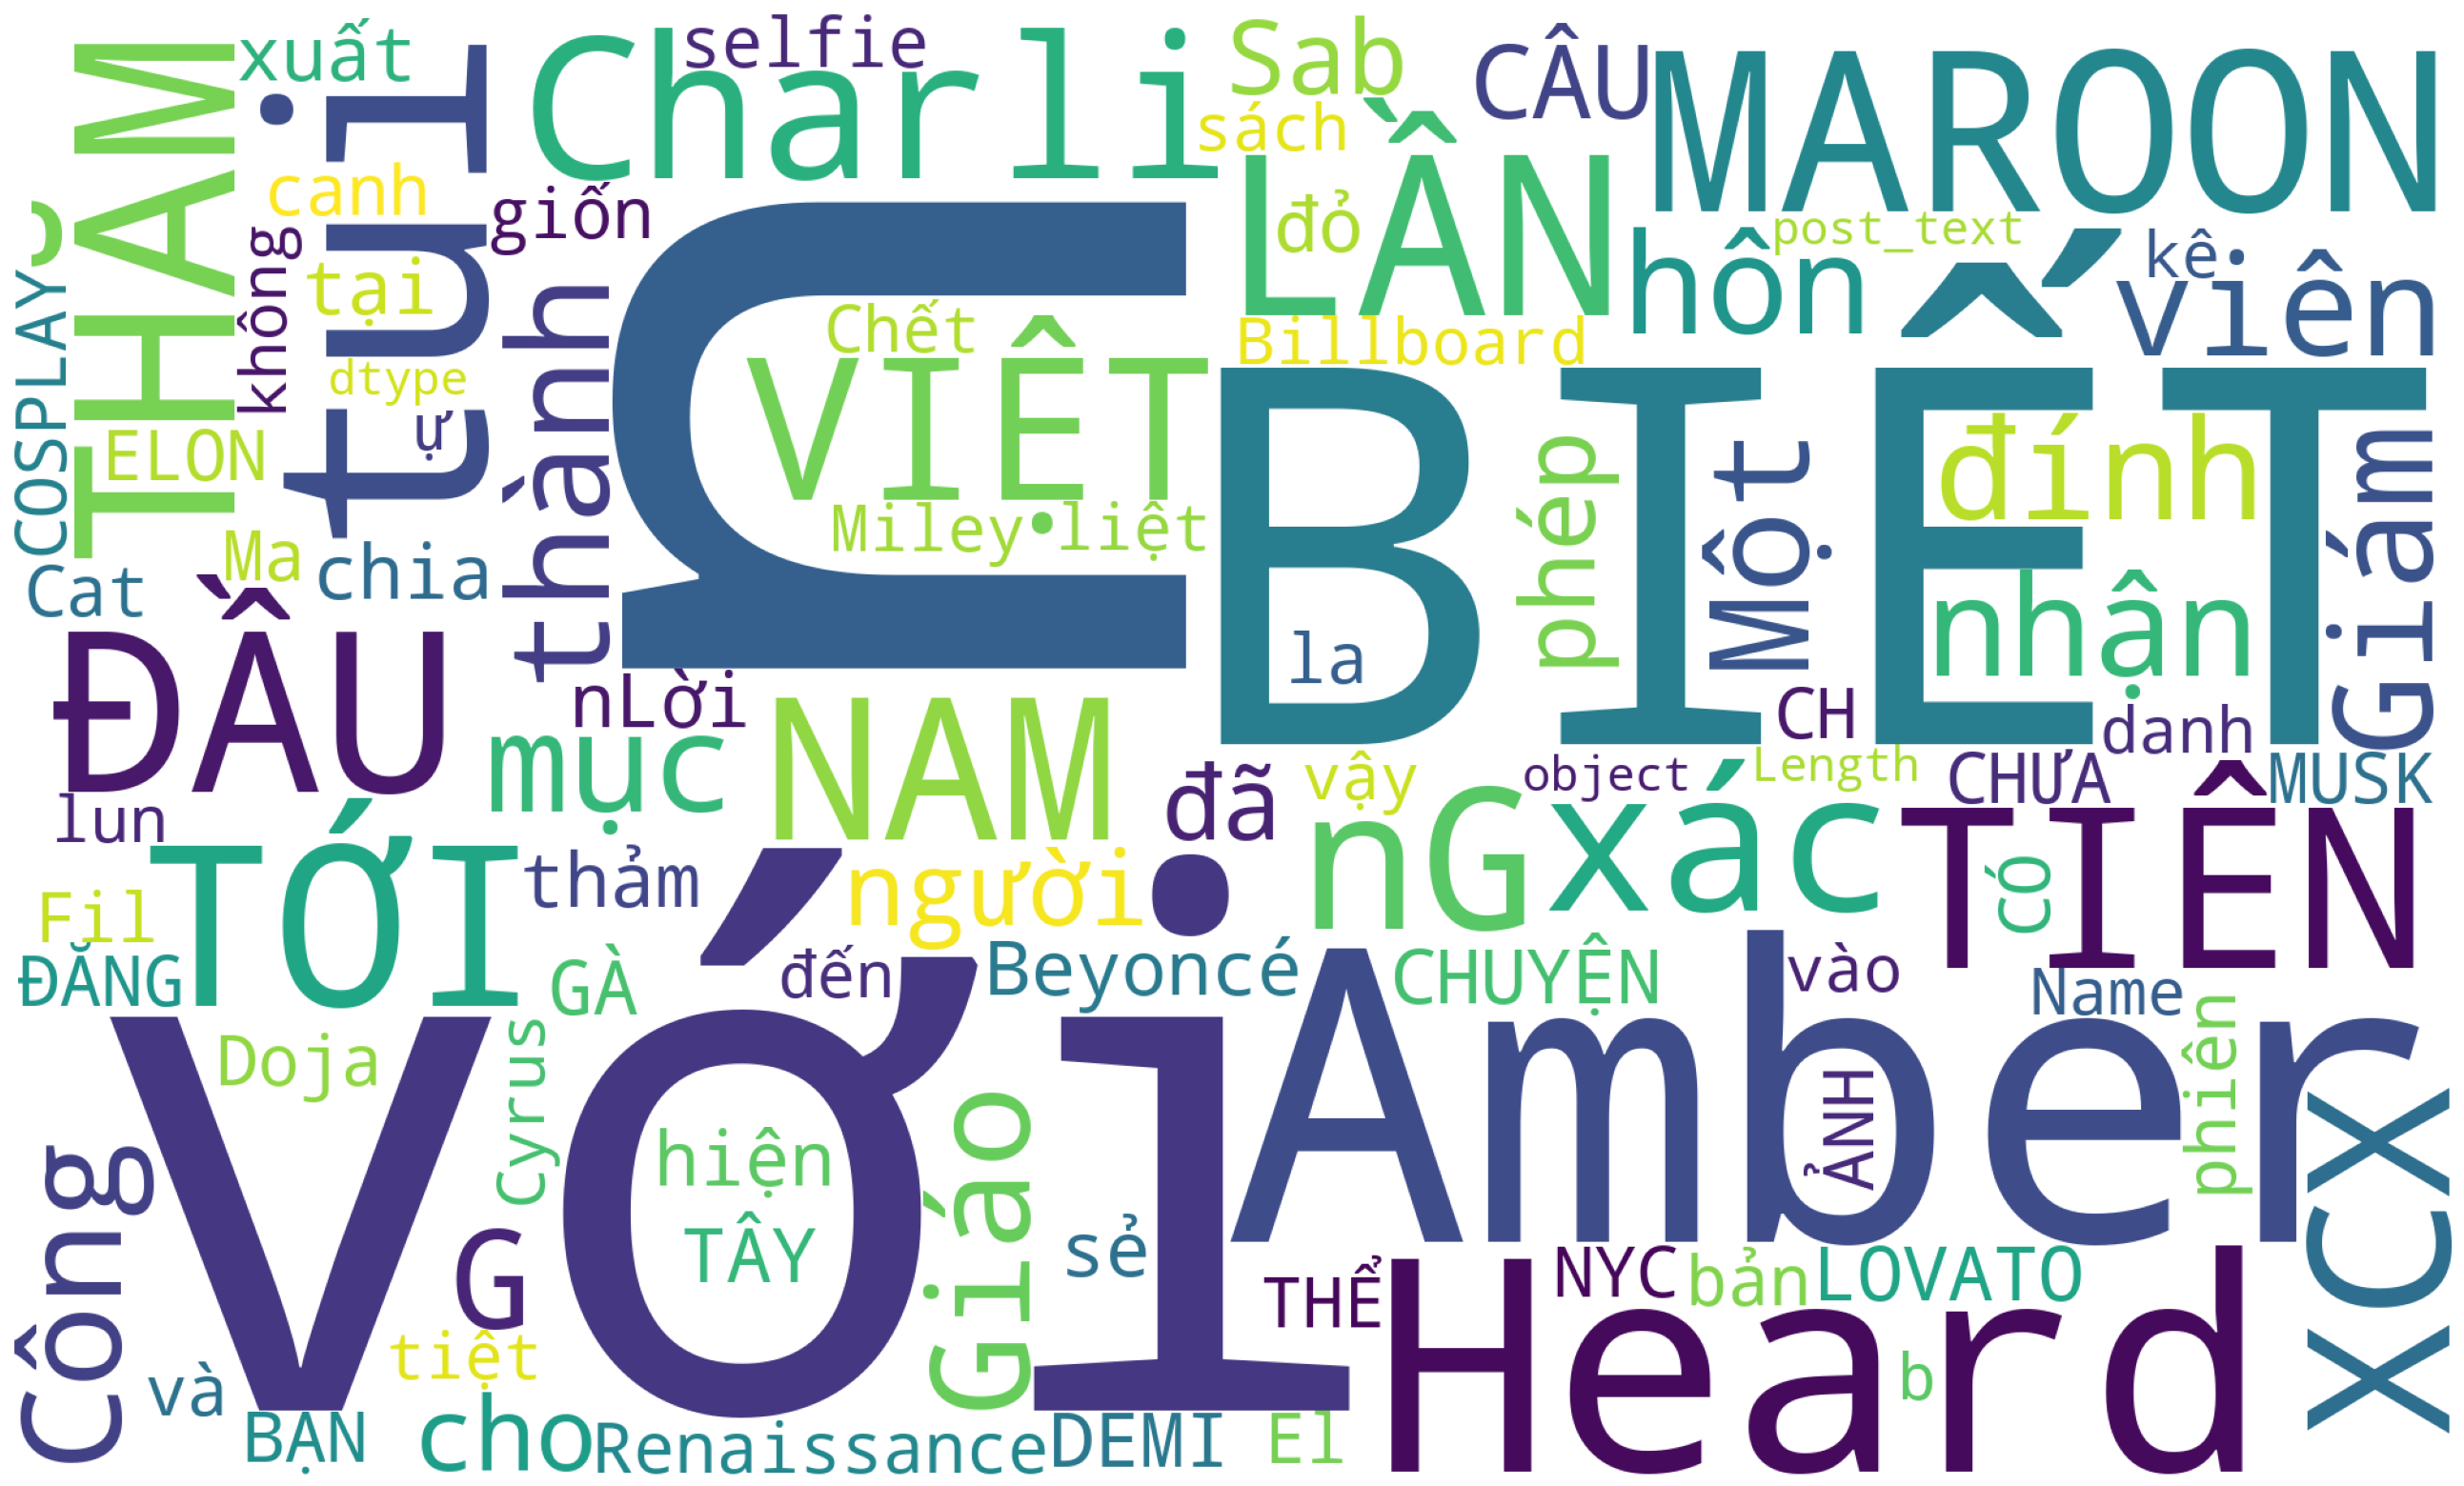

In [29]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## T√°ch th√†nh Dataframe comment

In [30]:
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [31]:
def creatCommentsFrame(df):
    df_result = {"comment_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "post_id" : []}
    
    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [32]:
df_Love_USUK_cmts = creatCommentsFrame(df)

In [33]:
df_Love_USUK_cmts

comment_id                                       comment_text  \
0      368325572427024  Nguyen Tran t·∫≠p b√†i n√†y mai m·ªët ƒëi concert h√°t...   
1      164619943410211             Lee B·∫£o ti·∫øc nh√≥m n√†y t m√™ t·ª´ nh·ªè lu√¥n   
2      349814544400991                            t ƒëang b·ª±c m√† g·∫∑p m n·ªØa   
3     1022742102141453                                             =)))))   
4     1778924032608803                       S∆°n Nguy·ªÖn l√™n d·∫ßn plan th√¥u   
...                ...                                                ...   
1033   744162360805098                                    Quo·∫°c Quo·∫°c üëåüèªü´°   
1034   844749430370138                                        HAÃÄNG TH√ÇÃ£T   
1035  1351601852098655                                   Ng√¢n An x·∫°o h√£ üò°   
1036   269155135985240                 N√≥i n·ªØa Taylor qu√™ b√¢y gi·ªù √° :((((   
1037   270012002164208                                        Ja Ite b·∫°ch   

     comment_time          post_id  
0      2023-11-01  747839004050965  
1      2023-11-01  747839004050965  
2      2023-11-02  747839004050965  
3      2023-11-01  747839004050965  
4      2023-11-02  747839004050965  
...           ...              ...  
1033   2023-09-30  704808921687307  
1034   2023-09-30  704808921687307  
1035   2023-08-30  704808921687307  
1036   2023-08-30  704808921687307  
1037   2023-08-30  704808921687307  

[1038 rows x 4 columns]

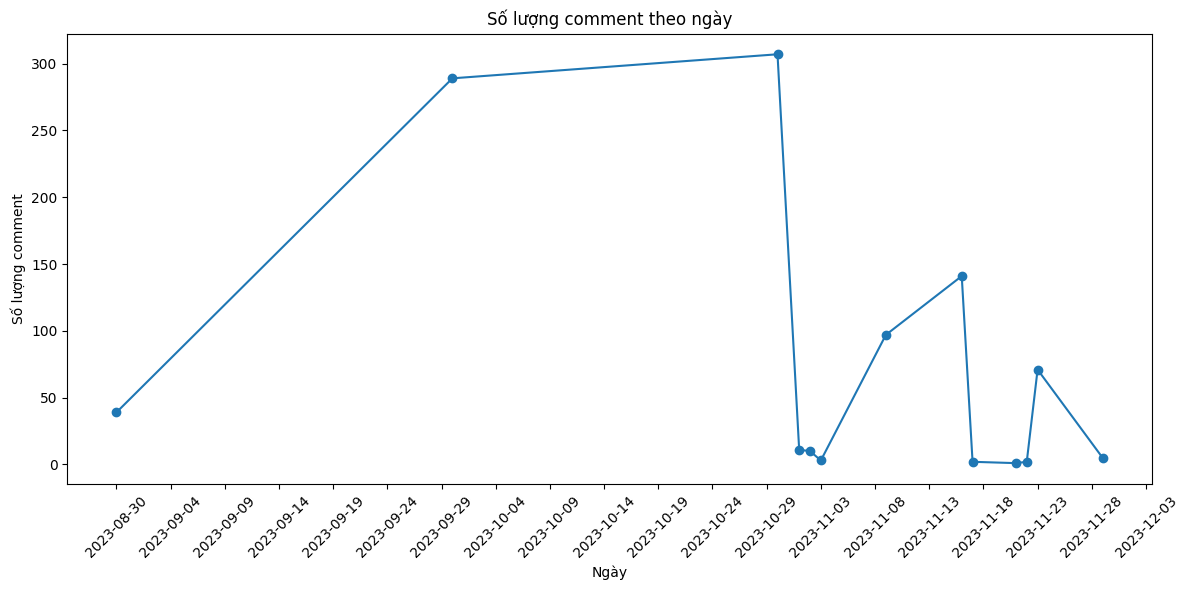

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DayLocator
df_Love_USUK_cmts['comment_time'] = pd.to_datetime(df_Love_USUK_cmts['comment_time'])
comment_counts_by_date = df_Love_USUK_cmts.groupby(df_Love_USUK_cmts['comment_time'].dt.date).size()
plt.figure(figsize=(12, 6))
plt.plot(comment_counts_by_date.index, comment_counts_by_date.values, marker='o', linestyle='-')

plt.xlabel('Ng√†y')
plt.ylabel('S·ªë l∆∞·ª£ng comment')
plt.title('S·ªë l∆∞·ª£ng comment theo ng√†y')
plt.xticks(rotation=45)
locator = DayLocator(interval=5)
plt.gca().xaxis.set_major_locator(locator)

plt.tight_layout()
plt.show()


In [35]:
com_text = str(df_Love_USUK_cmts['comment_text'])
print(com_text)

0       Nguyen Tran t·∫≠p b√†i n√†y mai m·ªët ƒëi concert h√°t...
1                  Lee B·∫£o ti·∫øc nh√≥m n√†y t m√™ t·ª´ nh·ªè lu√¥n
2                                 t ƒëang b·ª±c m√† g·∫∑p m n·ªØa
3                                                  =)))))
4                            S∆°n Nguy·ªÖn l√™n d·∫ßn plan th√¥u
                              ...                        
1033                                      Quo·∫°c Quo·∫°c üëåüèªü´°
1034                                          HAÃÄNG TH√ÇÃ£T
1035                                     Ng√¢n An x·∫°o h√£ üò°
1036                   N√≥i n·ªØa Taylor qu√™ b√¢y gi·ªù √° :((((
1037                                          Ja Ite b·∫°ch
Name: comment_text, Length: 1038, dtype: object


In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud_cleaned = WordCloud(stopwords=STOPWORDS,
                              background_color='white', 
                              max_words=2000,
                              width=5000, height=1800
                             ).generate(com_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud_cleaned)
plt.axis('off')
plt.show()
